In this computer vision exercise, we train a custom yolov5 model to detect if workers are wearing helmet and vests.

Clone to get the resources

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


Unzip the file containing the images and labels

In [2]:
!unzip -q /content/yolo.zip -d ../

In [3]:
# Train YOLOv5s for 500 epochs
!python train.py --img 640 --batch 8 --epochs 500 --data /content/yolov5/data/custom_data.yaml --weights yolov5s.pt --cache

2023-04-03 16:41:20.737484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 16:41:22.041068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset

Let's make some predictions on some images from the validation set

In [6]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source ../yolo/images/val

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=../yolo/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolo/images/val/Construction-workers-scaled.jpg: 384x640 4 helmets, 5 vests, 38.6ms
image 2/3 /content/yolo/images/val/betterteam-how-to-find-construction-laborers-2400x2400-20201123.jpeg: 640x640 2 helmets, 2 vests, 11.6ms
image 3/3 /content/yolo/images/val/construction-workers.jpg: 448x640 2 helmets, 1 vest, 41

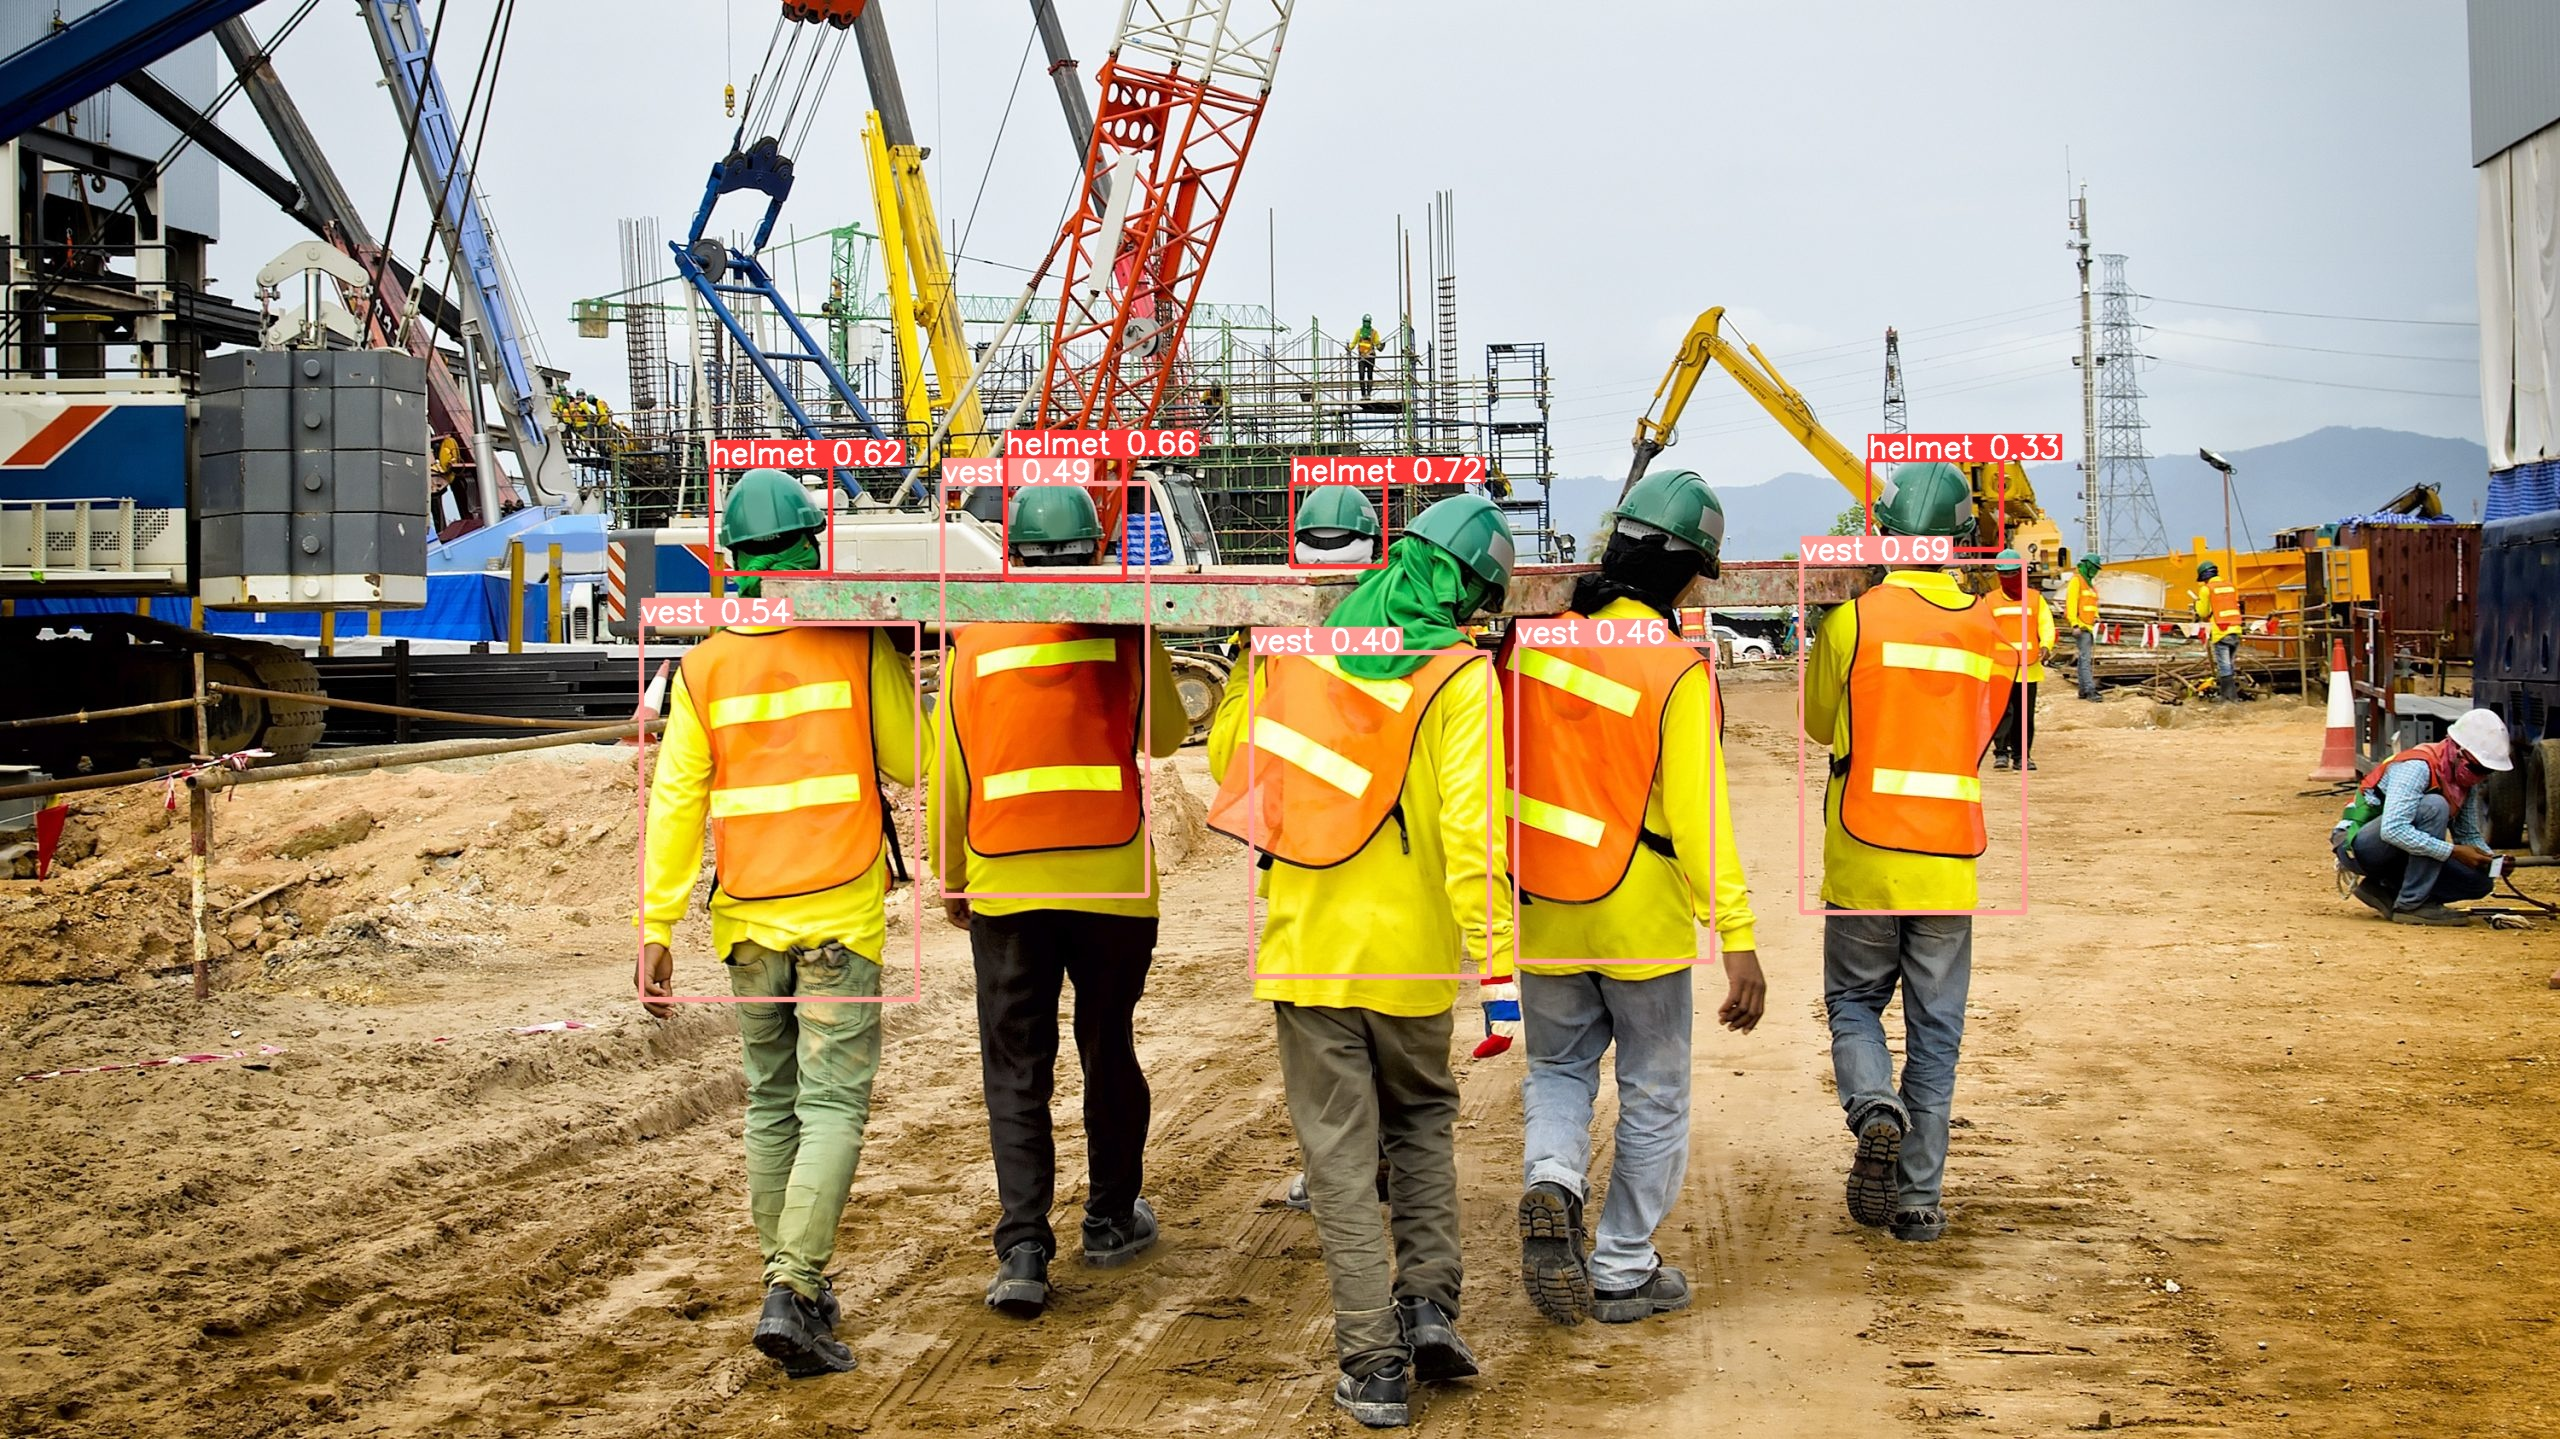

In [7]:
display.Image(filename='/content/yolov5/runs/detect/exp2/Construction-workers-scaled.jpg', width=600)

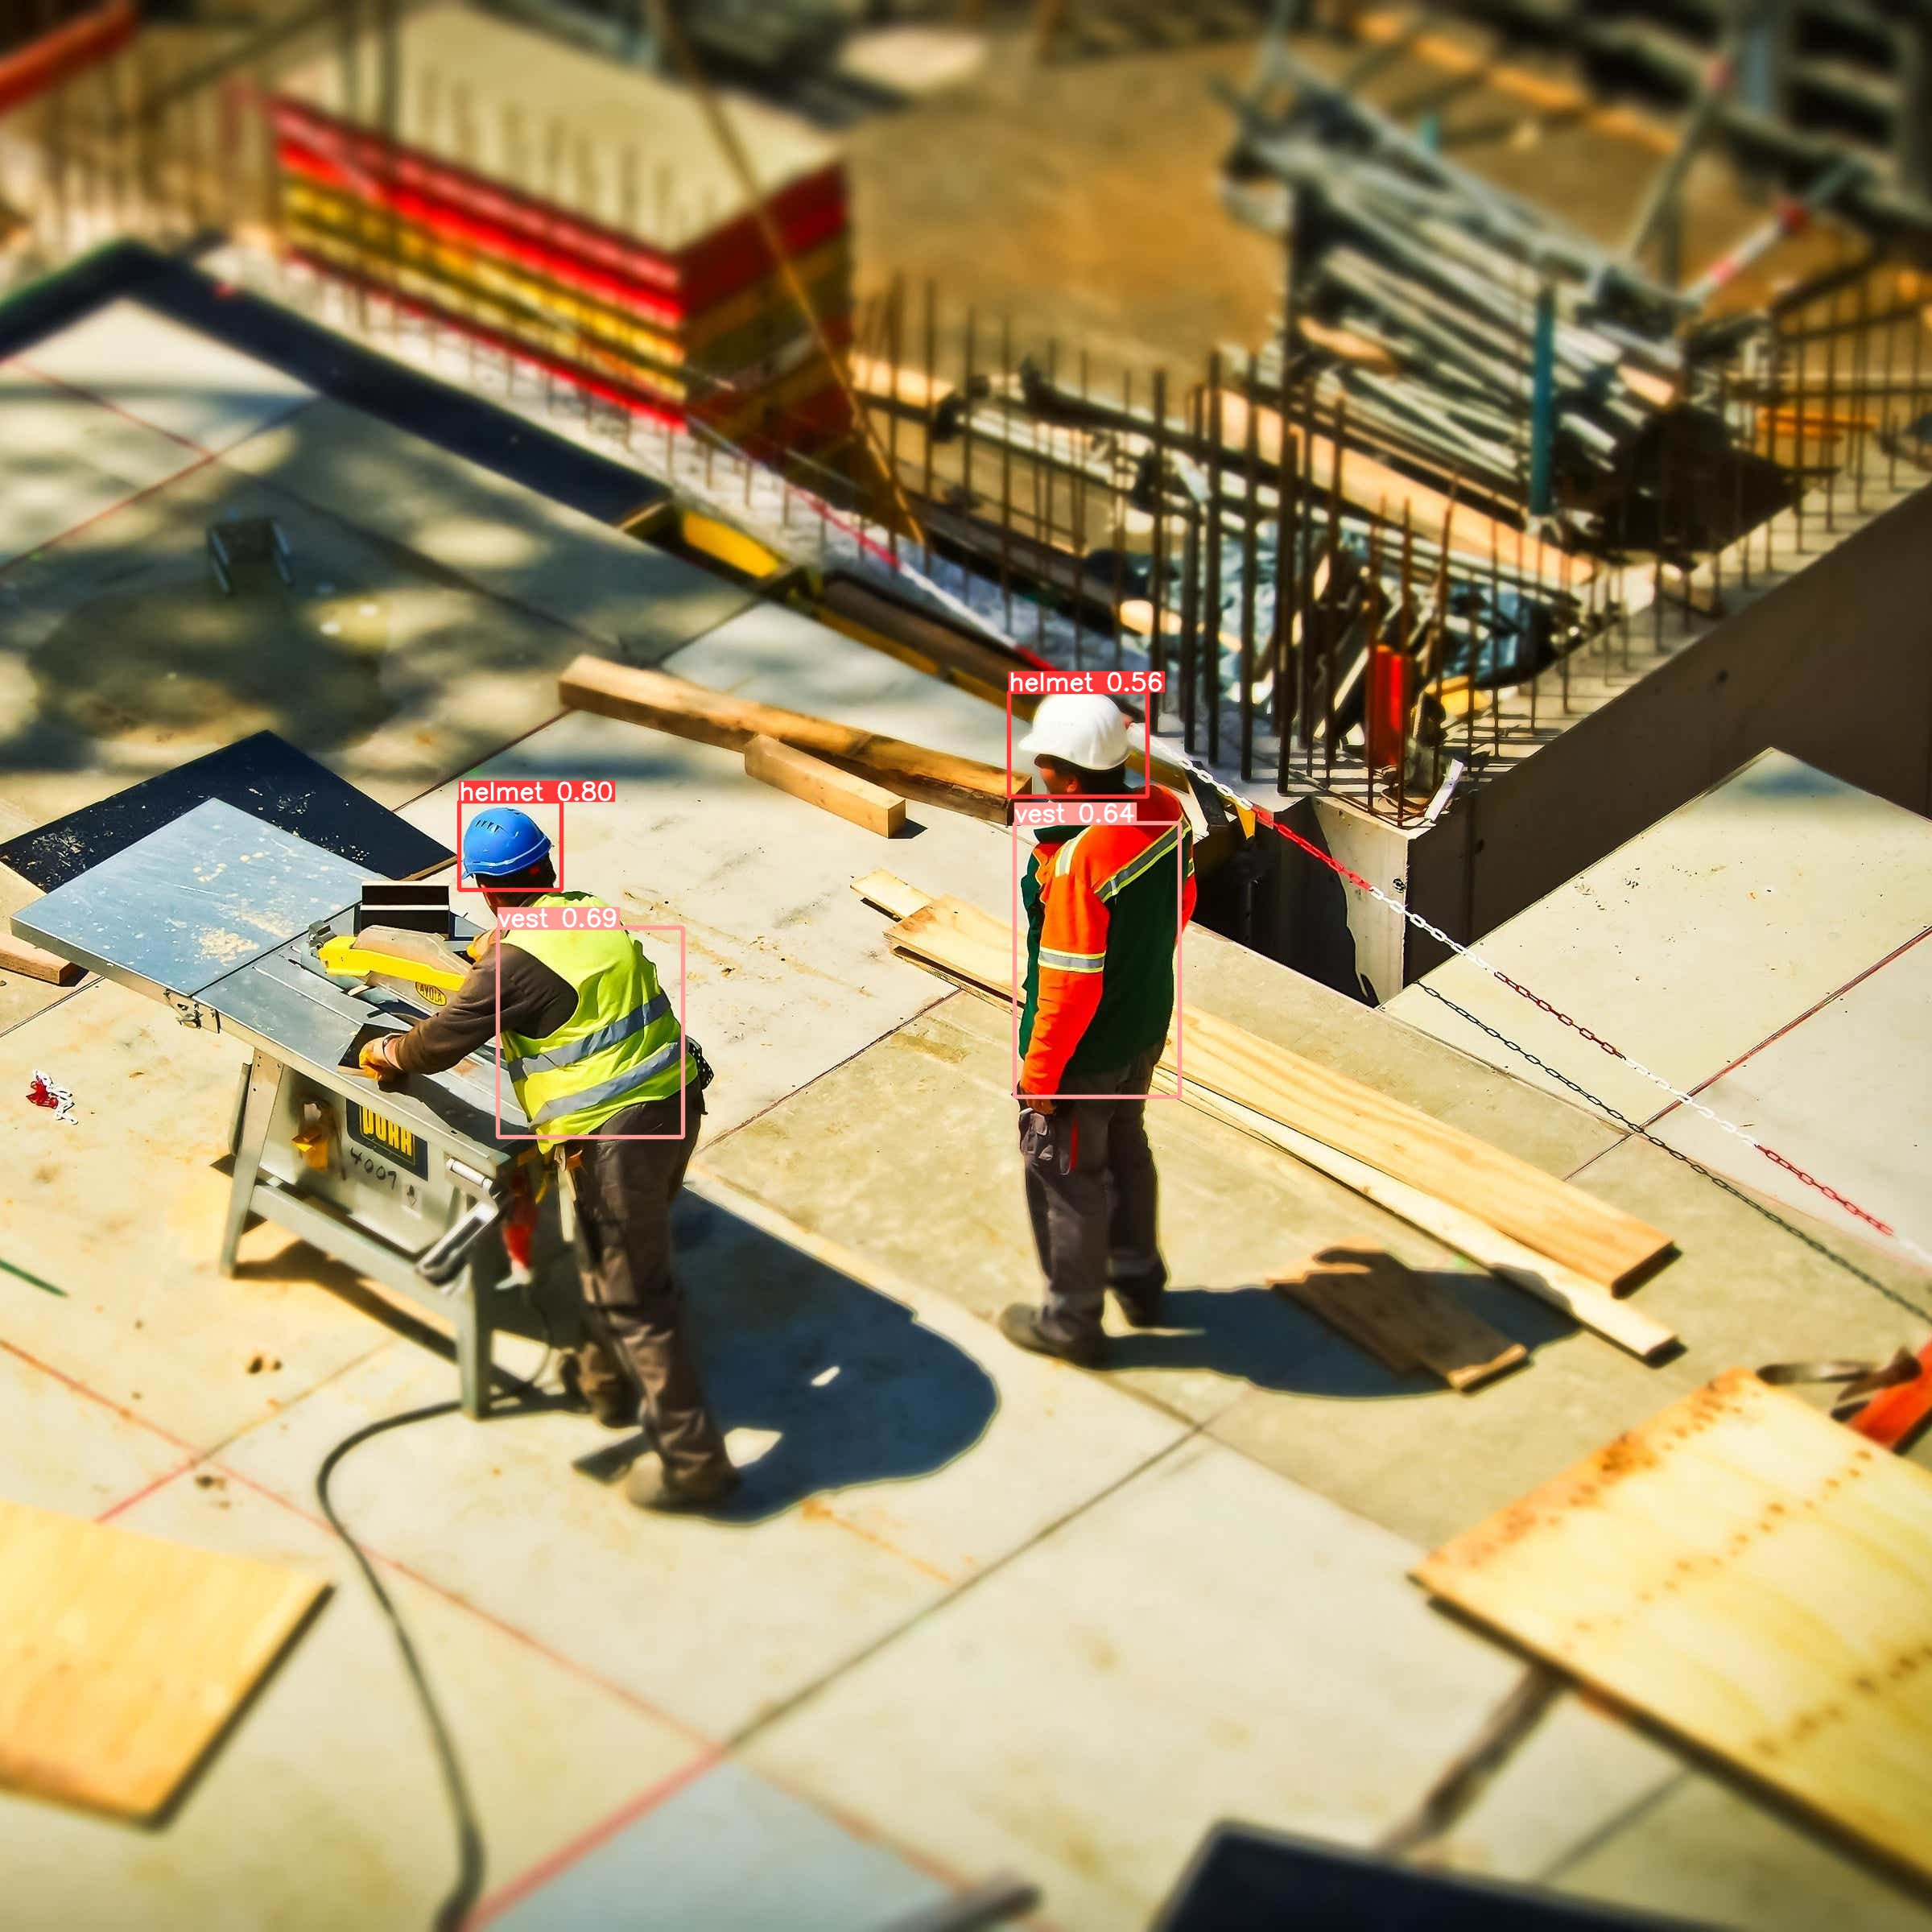

In [11]:
display.Image(filename='/content/yolov5/runs/detect/exp2/betterteam-how-to-find-construction-laborers-2400x2400-20201123.jpeg', width=600)

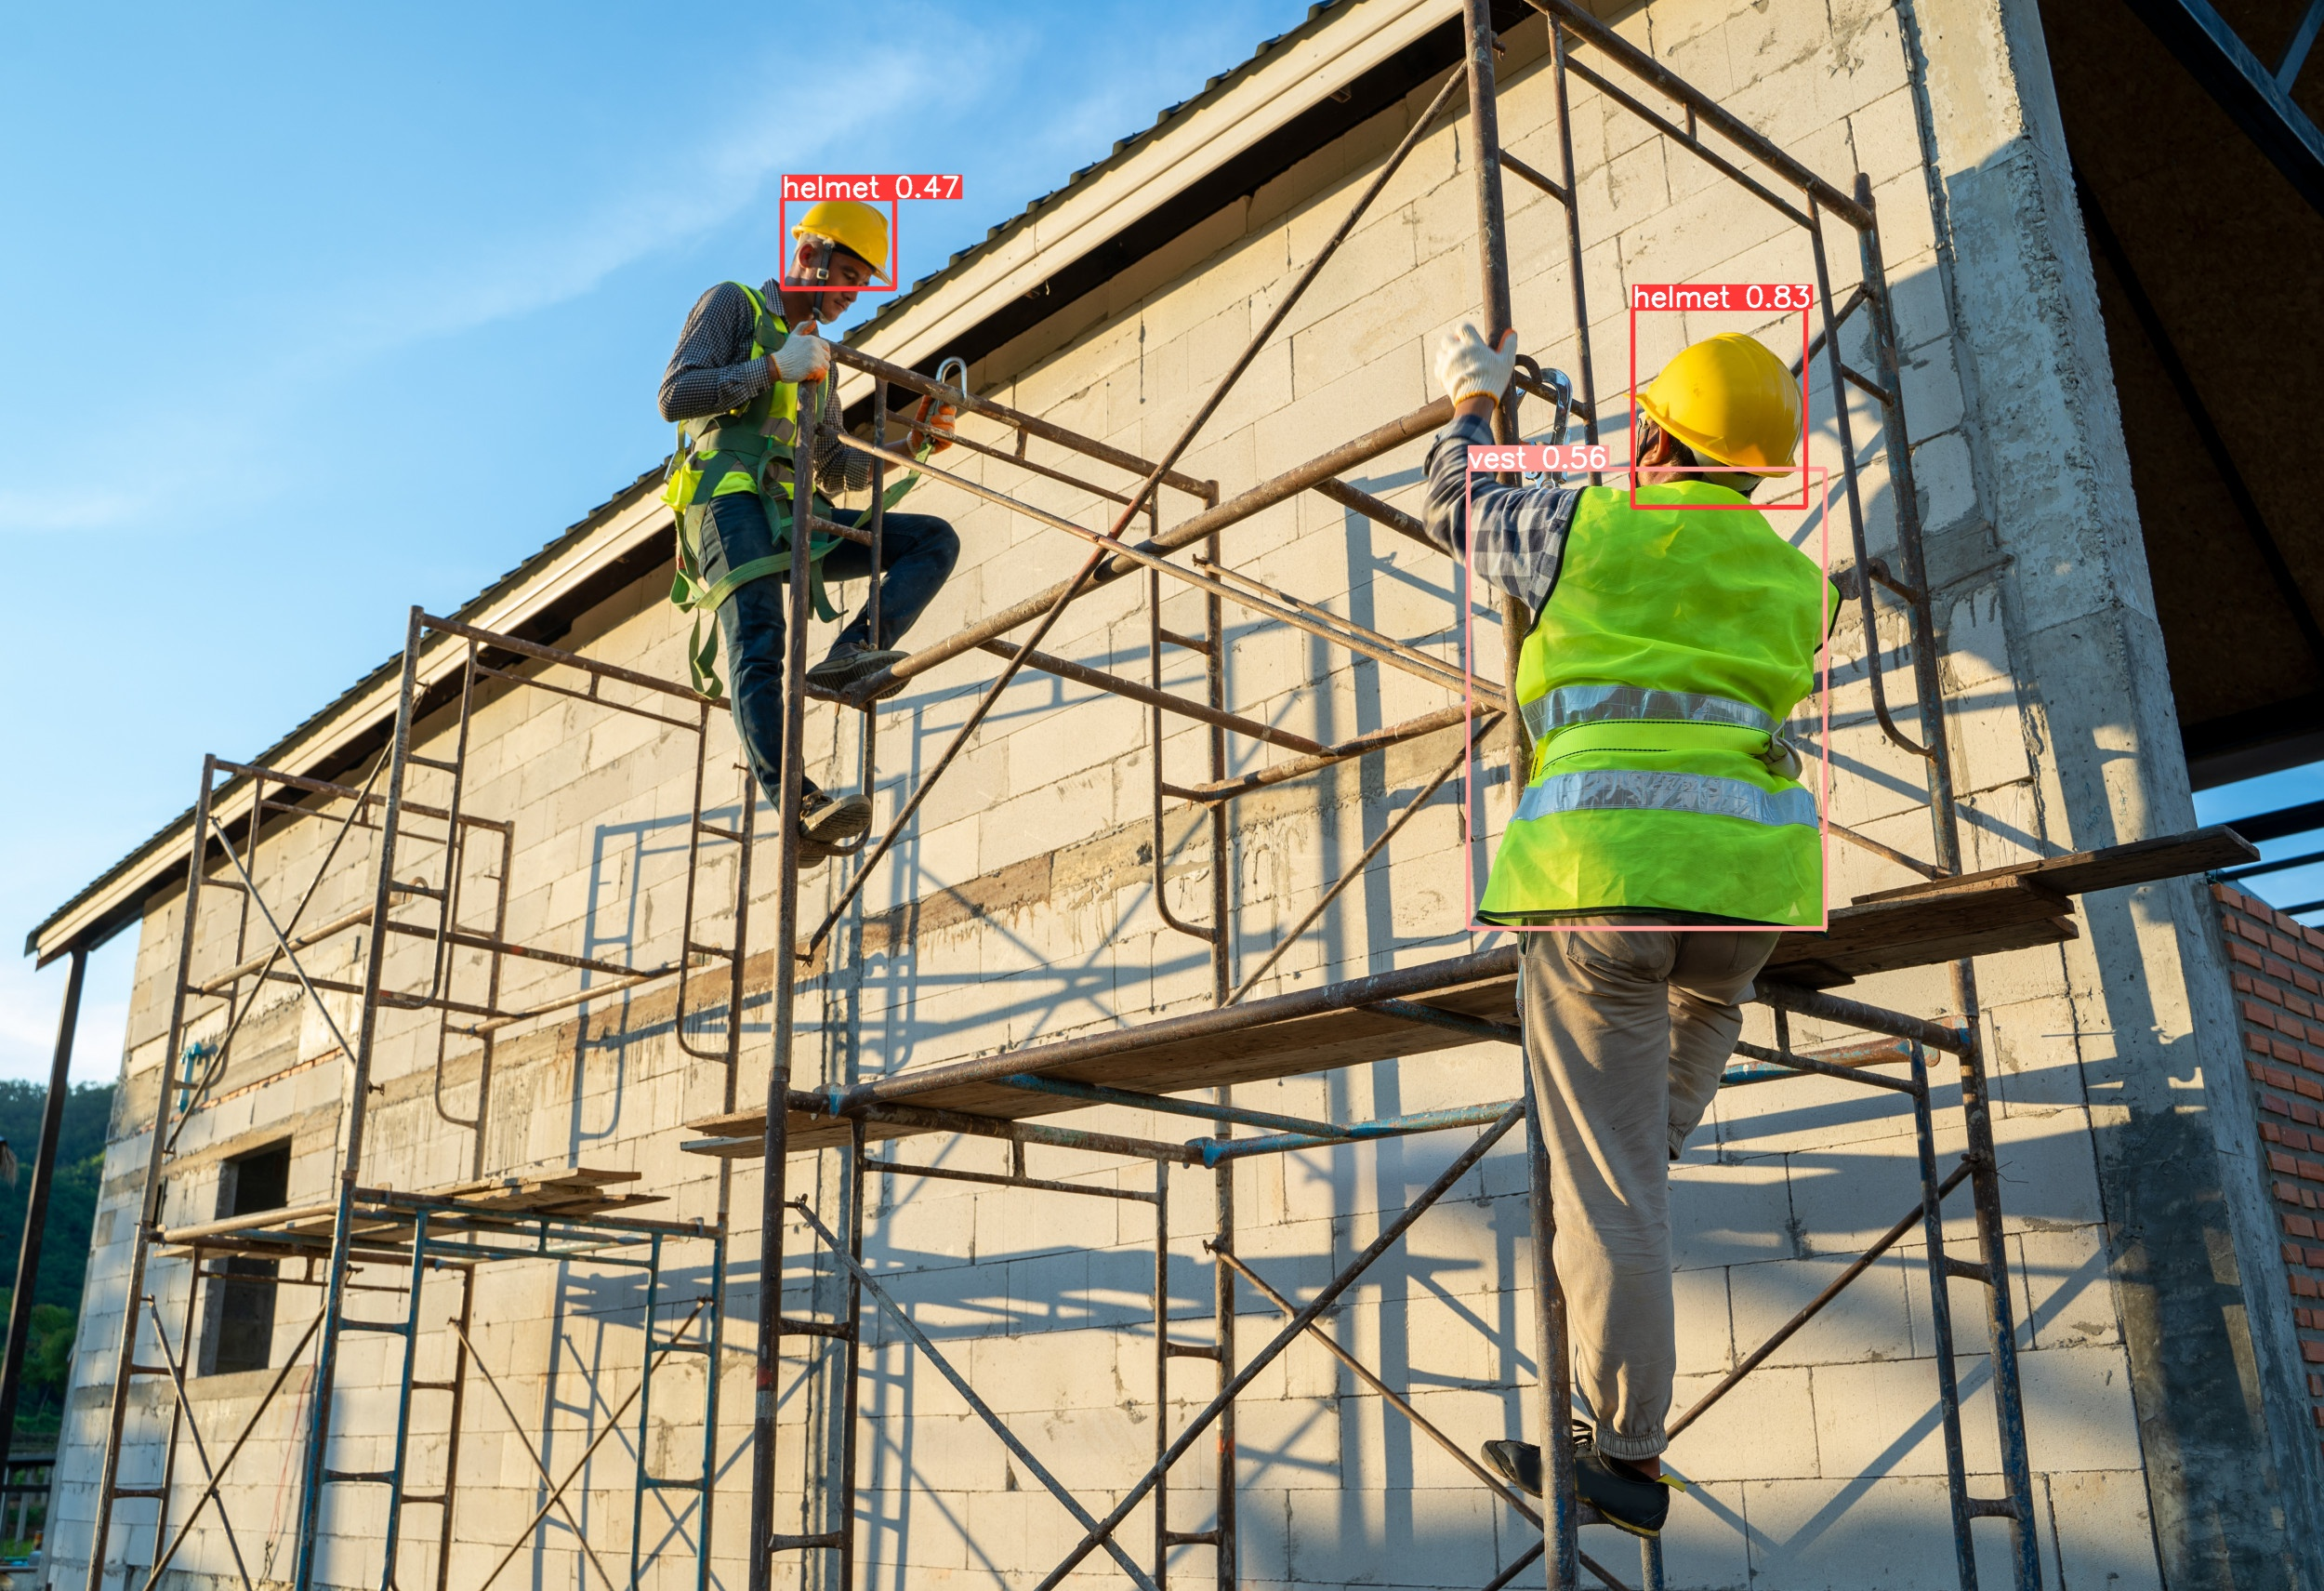

In [10]:
display.Image(filename='/content/yolov5/runs/detect/exp2/construction-workers.jpg', width=600)